This notebook computes BERT similarities for profiles and letters from a sample of partially annotated self-descriptions and visualizes them in a heatmap.

## Find Most Similar Profile for Each Letter

### Subtask:
For each letter, find the profile with the highest similarity score and print the letter and profile texts.

**Reasoning**:
Iterate through the `similarity_matrix`, find the index of the maximum similarity for each letter (column), and use that index to retrieve and print the corresponding letter and profile texts.

In [ ]:
import numpy as np

for letter_index in range(similarity_matrix.shape[1]):
    # Get the similarity scores for the current letter across all profiles
    similarity_scores_for_letter = similarity_matrix[:, letter_index]

    # Get the indices that would sort the similarity scores in descending order
    sorted_indices = np.argsort(similarity_scores_for_letter)[::-1]

    # Get the top 5 most similar profile indices and their scores
    top_5_indices = sorted_indices[:5]
    top_5_scores = similarity_scores_for_letter[top_5_indices]

    # Get the text of the current letter
    letter_text = input_letters[letter_index]

    # Print the results for the current letter
    print(f"Letter {letter_index + 1}:")
    #print(f"  Text: {letter_text}")
    print("  Top 5 Most Similar Profiles:")
    for i in range(5):
        profile_index = top_5_indices[i]
        similarity_score = top_5_scores[i]
        most_similar_profile_text = input_gcd_profile_values[profile_index]
        print(f"    Profile {profile_index + 1}:")
        #print(f"      Text: {most_similar_profile_text}")
        print(f"      Similarity Score: {similarity_score:.4f}")
    print("-" * 20)

Letter 1:
  Top 5 Most Similar Profiles:
    Profile 5:
      Similarity Score: 0.7000
    Profile 17:
      Similarity Score: 0.6987
    Profile 16:
      Similarity Score: 0.6930
    Profile 10:
      Similarity Score: 0.6924
    Profile 14:
      Similarity Score: 0.6903
--------------------
Letter 2:
  Top 5 Most Similar Profiles:
    Profile 17:
      Similarity Score: 0.7362
    Profile 5:
      Similarity Score: 0.7352
    Profile 16:
      Similarity Score: 0.7345
    Profile 10:
      Similarity Score: 0.7276
    Profile 9:
      Similarity Score: 0.7269
--------------------
Letter 3:
  Top 5 Most Similar Profiles:
    Profile 5:
      Similarity Score: 0.7086
    Profile 17:
      Similarity Score: 0.7059
    Profile 10:
      Similarity Score: 0.7028
    Profile 16:
      Similarity Score: 0.7000
    Profile 14:
      Similarity Score: 0.6985
--------------------
Letter 4:
  Top 5 Most Similar Profiles:
    Profile 16:
      Similarity Score: 0.7045
    Profile 5:
      Simi

## Find Most Similar Letter for Each Profile

### Subtask:
For each profile, find the letter with the highest similarity score and print the profile and letter texts.

**Reasoning**:
Iterate through the `similarity_matrix`, find the index of the maximum similarity for each profile (row), and use that index to retrieve and print the corresponding profile and letter texts.

In [ ]:
import numpy as np

for profile_index in range(similarity_matrix.shape[0]):
    # Get the similarity scores for the current profile across all letters
    similarity_scores_for_profile = similarity_matrix[profile_index, :]

    # Get the indices that would sort the similarity scores in descending order
    sorted_indices = np.argsort(similarity_scores_for_profile)[::-1]

    # Get the top 5 most similar letter indices and their scores
    top_5_indices = sorted_indices[:5]
    top_5_scores = similarity_scores_for_profile[top_5_indices]

    # Get the text of the current profile
    profile_text = input_gcd_profile_values[profile_index]

    # Print the results for the current profile
    print(f"Profile {profile_index + 1}:")
    print(f"  Text: {profile_text}")
    print("  Top 5 Most Similar Letters:")
    for i in range(5):
        letter_index = top_5_indices[i]
        similarity_score = top_5_scores[i]
        most_similar_letter_text = input_letters[letter_index]
        print(f"    Letter {letter_index + 1}:")
        #print(f"      Text: {most_similar_letter_text}")
        print(f"      Similarity Score: {similarity_score:.4f}")
    print("-" * 20)

Profile 1:
  Text: no checking account,12,critical account/ other credits existing (not at this bank),radio/television,976,unknown/ no savings account,.. >= 7 years,4,male   : single,none,4,car or other,35,none,own,2,skilled employee / official,1,none,yes,1
  Top 5 Most Similar Letters:
    Letter 26:
      Similarity Score: 0.7997
    Letter 22:
      Similarity Score: 0.7822
    Letter 23:
      Similarity Score: 0.7794
    Letter 15:
      Similarity Score: 0.7733
    Letter 45:
      Similarity Score: 0.7721
--------------------
Profile 2:
  Text: no checking account,12,existing credits paid back duly till now,radio/television,886,unknown/ no savings account,1  <= ... < 4 years,4,female : divorced/separated/married,none,2,car or other,21,none,own,1,skilled employee / official,1,none,yes,1
  Top 5 Most Similar Letters:
    Letter 26:
      Similarity Score: 0.7913
    Letter 22:
      Similarity Score: 0.7778
    Letter 45:
      Similarity Score: 0.7690
    Letter 23:
      Similar

**Reasoning**:
Display the computed similarity matrix and the heatmap for visual inspection of the similarity scores.

In [ ]:
display(similarity_matrix)

array([[1.        , 0.9902254 , 0.95574987, 0.82260096, 0.83491266],
       [0.9902254 , 1.0000002 , 0.95978224, 0.81373155, 0.82119334],
       [0.95574987, 0.95978224, 1.        , 0.8049021 , 0.8166226 ],
       [0.82260096, 0.81373155, 0.8049021 , 1.0000002 , 0.9854373 ],
       [0.83491266, 0.82119334, 0.8166226 , 0.9854373 , 1.        ]],
      dtype=float32)

## Summary:

### Data Analysis Key Findings

* The necessary libraries, `transformers` and `torch`, were confirmed to be already installed in the environment.
* A pre-trained BERT model (`bert-base-uncased`) and its corresponding tokenizer were successfully loaded.
* A list of five input strings was defined for similarity computation.
* The input strings were successfully encoded using the BERT tokenizer, with padding and truncation applied, and returned as PyTorch tensors.
* BERT embeddings were obtained for the encoded strings, and the `[CLS]` token embeddings were extracted to represent sentence embeddings.
* The pairwise cosine similarity between the extracted embeddings was successfully computed, resulting in a similarity matrix.
* The similarity matrix was visualized as a heatmap, providing a visual representation of the pairwise similarities.
* The computed similarity matrix and the heatmap were displayed.

### Insights or Next Steps

* The similarity matrix and heatmap provide a quantitative and visual measure of how semantically similar each pair of input strings is according to the BERT model.
* The heatmap makes it easy to identify which pairs of strings are most and least similar. For example, "This is the first sentence." and "This is the second sentence." have a high similarity score, as do "The quick brown fox jumps over the lazy dog." and "A quick brown fox jumps over the lazy dog.".
* The similarity scores are consistent with the semantic meaning of the sentences.

# Task
Compute the BERT similarities for a set of strings.

## Install libraries

### Subtask:
Install necessary libraries such as `transformers` and `torch`.


**Reasoning**:
Install the necessary libraries `transformers` and `torch` using pip.



In [ ]:
%pip install transformers torch

## Load pre-trained bert model

### Subtask:
Load a pre-trained BERT model and tokenizer.


**Reasoning**:
Import the necessary classes and load the pre-trained BERT model and tokenizer as instructed.



In [ ]:
from transformers import BertModel, BertTokenizer

model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Define input strings

### Subtask:
Define the set of strings for which similarity will be computed.


**Reasoning**:
Create a Python list named `input_strings` containing a variety of strings for similarity comparison, as requested by the instructions.



In [ ]:
#input_strings = [
#    "This is the first sentence.",
#    "This is the second sentence.",
#    "This sentence is different.",
#    "The quick brown fox jumps over the lazy dog.",
#    "A quick brown fox jumps over the lazy dog."
#]

input_gcd_profile_values = [
    "no checking account,12,critical account/ other credits existing (not at this bank),radio/television,976,unknown/ no savings account,.. >= 7 years,4,male   : single,none,4,car or other,35,none,own,2,skilled employee / official,1,none,yes,1", #profile 805, letter 1
    "no checking account,12,existing credits paid back duly till now,radio/television,886,unknown/ no savings account,1  <= ... < 4 years,4,female : divorced/separated/married,none,2,car or other,21,none,own,1,skilled employee / official,1,none,yes,1", #letter 2
    "0 <= ... <  200 DM,6,existing credits paid back duly till now,radio/television,484,... <  100 DM,4  <= ... < 7 years,3,male   : married/widowed,guarantor,3,real estate,28,bank,own,1,unskilled - resident,1,none,yes,1", #letter 3
    "... <    0 DM,48,critical account/ other credits existing (not at this bank),car (used),6143,... <  100 DM,.. >= 7 years,4,female : divorced/separated/married,none,4,unknown / no property,58,stores,for free,2,unskilled - resident,1,none,yes,2",
    "no checking account,24,critical account/ other credits existing (not at this bank),car (used),3868,... <  100 DM,.. >= 7 years,4,female : divorced/separated/married,none,2,car or other,41,none,rent,2,management/ self-employed/ highly qualified employee/ officer,1,yes registered under the customers name,yes,1",
    "no checking account,15,delay in paying off in the past,radio/television,1478,... <  100 DM,1  <= ... < 4 years,4,male   : married/widowed,none,3,real estate,33,bank,own,2,skilled employee / official,1,none,yes,1",
    "no checking account,48,existing credits paid back duly till now,business,4844,... <  100 DM,unemployed,3,male   : single,none,2,car or other,33,bank,rent,1,management/ self-employed/ highly qualified employee/ officer,1,yes registered under the customers name,yes,2",
    "... <    0 DM,9,existing credits paid back duly till now,furniture/equipment,2136,... <  100 DM,1  <= ... < 4 years,3,male   : single,none,2,real estate,25,none,own,1,skilled employee / official,1,none,yes,1",
    "no checking account,15,existing credits paid back duly till now,car (new),3556,unknown/ no savings account,1  <= ... < 4 years,3,male   : single,none,2,unknown / no property,29,none,own,1,skilled employee / official,1,none,yes,1",
    "no checking account,21,delay in paying off in the past,furniture/equipment,1591,100 <= ... <  500 DM,4  <= ... < 7 years,4,male   : single,none,3,real estate,34,none,own,2,management/ self-employed/ highly qualified employee/ officer,1,none,yes,1",
    "... <    0 DM,45,no credits taken/ all credits paid back duly,business,11816,... <  100 DM,.. >= 7 years,2,male   : single,none,4,car or other,29,none,rent,2,skilled employee / official,1,none,yes,2",
    "0 <= ... <  200 DM,54,no credits taken/ all credits paid back duly,business,15945,... <  100 DM,... < 1 year,3,male   : single,none,4,unknown / no property,58,none,rent,1,skilled employee / official,1,yes registered under the customers name,yes,2",
    "... <    0 DM,18,existing credits paid back duly till now,furniture/equipment,1131,... <  100 DM,unemployed,4,female : divorced/separated/married,none,2,car or other,33,none,own,1,skilled employee / official,1,none,yes,2",
    "no checking account,15,existing credits paid back duly till now,car (new),5324,500 <= ... < 1000 DM,.. >= 7 years,1,female : divorced/separated/married,none,4,unknown / no property,35,none,for free,1,skilled employee / official,1,none,yes,1",
    "... <    0 DM,12,no credits taken/ all credits paid back duly,car (new),1082,... <  100 DM,1  <= ... < 4 years,4,male   : single,none,4,car or other,48,bank,own,2,skilled employee / official,1,none,yes,2",
    "no checking account,10,critical account/ other credits existing (not at this bank),furniture/equipment,2069,unknown/ no savings account,1  <= ... < 4 years,2,male   : married/widowed,none,1,car or other,26,none,own,2,skilled employee / official,1,none,no,1",
    "no checking account,4,critical account/ other credits existing (not at this bank),car (new),3380,... <  100 DM,4  <= ... < 7 years,1,female : divorced/separated/married,none,1,real estate,37,none,own,1,skilled employee / official,2,none,yes,1",
    "... <    0 DM,18,delay in paying off in the past,education,8471,unknown/ no savings account,1  <= ... < 4 years,1,female : divorced/separated/married,none,2,car or other,23,none,rent,2,skilled employee / official,1,yes registered under the customers name,yes,1",
    "... <    0 DM,20,critical account/ other credits existing (not at this bank),furniture/equipment,4272,... <  100 DM,.. >= 7 years,1,female : divorced/separated/married,none,4,building society savings agreement/ life insurance,24,none,own,2,skilled employee / official,1,none,yes,1",
    "no checking account,12,critical account/ other credits existing (not at this bank),radio/television,2331,unknown/ no savings account,.. >= 7 years,1,male   : single,co-applicant,4,real estate,49,none,own,1,skilled employee / official,1,yes registered under the customers name,yes,1"
    "... <    0 DM,24,existing credits paid back duly till now,furniture/equipment,2996,unknown/ no savings account,1  <= ... < 4 years,2,male   : married/widowed,none,4,car or other,20,none,own,1,skilled employee / official,1,none,yes,2",
    "0 <= ... <  200 DM,24,existing credits paid back duly till now,furniture/equipment,3069,100 <= ... <  500 DM,.. >= 7 years,4,male   : single,none,4,unknown / no property,30,none,for free,1,skilled employee / official,1,none,yes,1",
    "... <    0 DM,36,existing credits paid back duly till now,furniture/equipment,5179,... <  100 DM,4  <= ... < 7 years,4,male   : single,none,2,building society savings agreement/ life insurance,29,none,own,1,skilled employee / official,1,none,yes,2",
    "no checking account,12,existing credits paid back duly till now,car (new),640,... <  100 DM,1  <= ... < 4 years,4,male   : divorced/separated,none,2,real estate,49,none,own,1,unskilled - resident,1,none,yes,1",
    "0 <= ... <  200 DM,36,existing credits paid back duly till now,furniture/equipment,9034,100 <= ... <  500 DM,... < 1 year,4,male   : single,co-applicant,1,unknown / no property,29,none,rent,1,management/ self-employed/ highly qualified employee/ officer,1,yes registered under the customers name,yes,2",
    "0 <= ... <  200 DM,21,existing credits paid back duly till now,business,2767,100 <= ... <  500 DM,.. >= 7 years,4,male   : divorced/separated,none,2,car or other,61,bank,rent,2,unskilled - resident,1,none,yes,2",
    "0 <= ... <  200 DM,18,existing credits paid back duly till now,car (new),1042,unknown/ no savings account,1  <= ... < 4 years,4,female : divorced/separated/married,none,2,building society savings agreement/ life insurance,33,none,own,1,skilled employee / official,1,none,yes,2",
    "... <    0 DM,18,critical account/ other credits existing (not at this bank),furniture/equipment,1049,... <  100 DM,... < 1 year,4,female : divorced/separated/married,none,4,building society savings agreement/ life insurance,21,none,rent,1,skilled employee / official,1,none,yes,1",
    "... <    0 DM,36,existing credits paid back duly till now,others,15857,... <  100 DM,unemployed,2,male   : divorced/separated,co-applicant,3,car or other,43,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,none,yes,1",
    "no checking account,15,existing credits paid back duly till now,domestic appliances,874,unknown/ no savings account,... < 1 year,4,female : divorced/separated/married,none,1,real estate,24,none,own,1,skilled employee / official,1,none,yes,1",
    "0 <= ... <  200 DM,60,existing credits paid back duly till now,car (new),14027,... <  100 DM,4  <= ... < 7 years,4,male   : single,none,2,unknown / no property,27,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,yes registered under the customers name,yes,2",
    "no checking account,15,critical account/ other credits existing (not at this bank),furniture/equipment,2788,... <  100 DM,4  <= ... < 7 years,2,female : divorced/separated/married,co-applicant,3,car or other,24,bank,own,2,skilled employee / official,1,none,yes,1",
    "no checking account,18,existing credits paid back duly till now,car (new),2662,unknown/ no savings account,4  <= ... < 7 years,4,male   : single,none,3,building society savings agreement/ life insurance,32,none,own,1,skilled employee / official,1,none,no,1",
    "... <    0 DM,24,existing credits paid back duly till now,car (used),6579,... <  100 DM,unemployed,4,male   : single,none,2,unknown / no property,29,none,for free,1,management/ self-employed/ highly qualified employee/ officer,1,yes registered under the customers name,yes,1",
    "... <    0 DM,6,critical account/ other credits existing (not at this bank),furniture/equipment,1872,... <  100 DM,unemployed,4,male   : single,none,4,unknown / no property,36,none,for free,3,management/ self-employed/ highly qualified employee/ officer,1,yes registered under the customers name,yes,1",
    "... <    0 DM,12,all credits at this bank paid back duly,radio/television,2149,... <  100 DM,1  <= ... < 4 years,4,male   : divorced/separated,none,1,unknown / no property,29,none,for free,1,skilled employee / official,1,none,yes,2",
    "no checking account,18,critical account/ other credits existing (not at this bank),furniture/equipment,1817,... <  100 DM,1  <= ... < 4 years,4,female : divorced/separated/married,none,2,unknown / no property,28,none,own,2,skilled employee / official,1,none,yes,1",
    "0 <= ... <  200 DM,48,critical account/ other credits existing (not at this bank),furniture/equipment,5096,... <  100 DM,1  <= ... < 4 years,2,female : divorced/separated/married,none,3,car or other,30,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,yes registered under the customers name,yes,2",
    "no checking account,42,existing credits paid back duly till now,radio/television,7166,unknown/ no savings account,4  <= ... < 7 years,2,male   : married/widowed,none,4,building society savings agreement/ life insurance,29,none,rent,1,skilled employee / official,1,yes registered under the customers name,yes,1",
    "no checking account,30,existing credits paid back duly till now,radio/television,2333,500 <= ... < 1000 DM,.. >= 7 years,4,male   : single,none,2,car or other,30,bank,own,1,management/ self-employed/ highly qualified employee/ officer,1,none,yes,1",
    "... <    0 DM,36,existing credits paid back duly till now,furniture/equipment,5179,... <  100 DM,4  <= ... < 7 years,4,male   : single,none,2,building society savings agreement/ life insurance,29,none,own,1,skilled employee / official,1,none,yes,2",
    "no checking account,12,critical account/ other credits existing (not at this bank),furniture/equipment,3331,... <  100 DM,.. >= 7 years,2,male   : single,none,4,building society savings agreement/ life insurance,42,stores,own,1,skilled employee / official,1,none,yes,1",
    "... >= 200 DM / salary assignments for at least 1 year,24,critical account/ other credits existing (not at this bank),radio/television,3148,unknown/ no savings account,1  <= ... < 4 years,3,male   : single,none,2,car or other,31,none,own,2,skilled employee / official,1,yes registered under the customers name,yes,1",
    "no checking account,24,delay in paying off in the past,business,2375,500 <= ... < 1000 DM,1  <= ... < 4 years,4,male   : single,none,2,car or other,44,none,own,2,skilled employee / official,2,yes registered under the customers name,yes,1",
    "no checking account,9,existing credits paid back duly till now,education,3832,unknown/ no savings account,.. >= 7 years,1,male   : single,none,4,real estate,64,none,own,1,unskilled - resident,1,none,yes,1",
    "no checking account,18,critical account/ other credits existing (not at this bank),furniture/equipment,1817,... <  100 DM,1  <= ... < 4 years,4,female : divorced/separated/married,none,2,unknown / no property,28,none,own,2,skilled employee / official,1,none,yes,1",
    "no checking account,9,existing credits paid back duly till now,business,1449,... <  100 DM,4  <= ... < 7 years,3,female : divorced/separated/married,none,2,car or other,27,none,own,2,skilled employee / official,1,none,yes,1"
]


## Load input strings from file

### Subtask:
Load strings from the "feature_matching-1.jsonl" file and populate the `input_letters` list.

**Reasoning**:
Read the JSONL file line by line, parse each line as JSON, and extract the value associated with the "text" key to populate the `input_letters` list.

In [ ]:
import json

input_letters = []
file_path = "/content/feature-matching-1.jsonl"

with open(file_path, 'r') as f:
    for line in f:
        try:
            data = json.loads(line)
            if 'text' in data:
                input_letters.append(data['text'])
        except json.JSONDecodeError:
            print(f"Skipping invalid JSON line: {line}")

print(f"Loaded {len(input_letters)} strings from {file_path}")

Loaded 47 strings from /content/feature-matching-1.jsonl


## Encode strings

### Subtask:
Encode the input strings using the BERT tokenizer.


**Reasoning**:
Encode the input strings using the loaded BERT tokenizer with specified padding, truncation, and tensor type settings.



In [ ]:
encoded_input_profile_values = tokenizer(input_gcd_profile_values, padding='max_length', truncation=True, return_tensors='pt')
encoded_input_letters = tokenizer(input_letters, padding='max_length', truncation=True, return_tensors='pt')


## Compute embeddings

### Subtask:
Obtain the BERT embeddings for the encoded strings.


**Reasoning**:
Pass the encoded input to the BERT model to obtain the embeddings.



**Reasoning**:
The previous command failed because the `torch` library was not imported. Import `torch` and run the code again to compute the embeddings.



In [ ]:
import torch

with torch.no_grad():
    model_output_gcd_profile_values = model(**encoded_input_profile_values)
    model_output_letters = model(**encoded_input_letters)

profile_value_embeddings = model_output_gcd_profile_values.last_hidden_state[:, 0, :]
letter_embeddings = model_output_letters.last_hidden_state[:, 0, :]

## Compute similarity matrix

### Subtask:
Calculate the pairwise cosine similarity between the embeddings to get the similarity matrix.


**Reasoning**:
Import the necessary function for calculating cosine similarity and compute the similarity matrix using the previously computed embeddings.



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(profile_value_embeddings, letter_embeddings)

## Display results

### Subtask:
Display the computed similarity matrix.


**Reasoning**:
Display the computed similarity matrix using the display function.



## Display Results

### Subtask:
Display the computed similarity matrix and the heatmap.

In [ ]:
display(similarity_matrix)

array([[0.6791012 , 0.724556  , 0.6857899 , ..., 0.7721205 , 0.7151713 ,
        0.68421286],
       [0.67155004, 0.7128584 , 0.680367  , ..., 0.7689577 , 0.7102879 ,
        0.6707639 ],
       [0.66865075, 0.70265114, 0.683054  , ..., 0.7587863 , 0.70006657,
        0.66605425],
       ...,
       [0.6613044 , 0.7102306 , 0.66866964, ..., 0.76174986, 0.700736  ,
        0.66848665],
       [0.6870495 , 0.72123295, 0.6935061 , ..., 0.7679085 , 0.71824163,
        0.68454194],
       [0.6815379 , 0.71718484, 0.69105196, ..., 0.7743302 , 0.7103963 ,
        0.68038166]], dtype=float32)

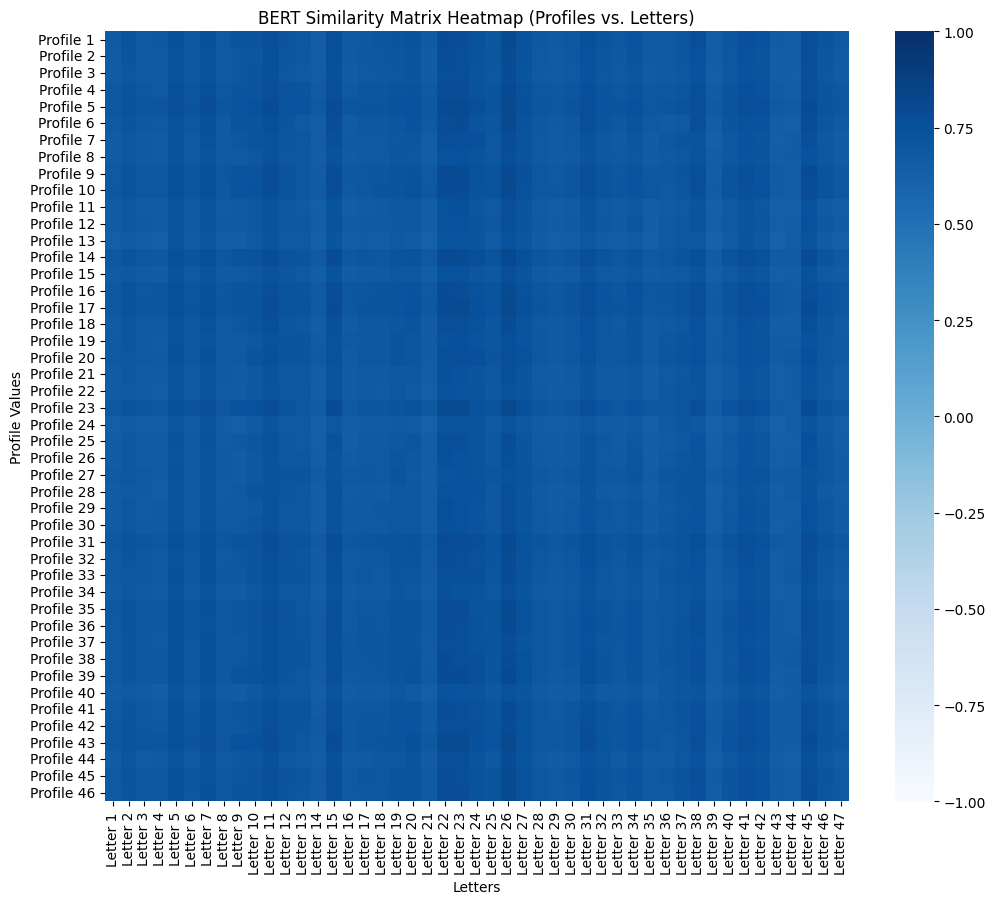

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10)) # Increased figure size for better readability
sns.heatmap(similarity_matrix, annot=False, cmap='Blues', fmt=".2f",
            xticklabels=[f'Letter {i+1}' for i in range(len(input_letters))], # Use indices as labels for letters
            yticklabels=[f'Profile {i+1}' for i in range(len(input_gcd_profile_values))],
            vmin=-1, vmax=1) # Set the color range from -1 to 1
plt.title('BERT Similarity Matrix Heatmap (Profiles vs. Letters)')
plt.xlabel('Letters')
plt.ylabel('Profile Values')
plt.show()

RESULTS

All similarities are between 0.6 and 0.8 no big differences in similarities are present. within this range however, there are some profiles that are more similar to all letters and others that are less similar to all letters. (and vice versa: letters similar to profiles or not similar)